<h1>W15 Isothermen realer Gase</h1>

Simon Legtenborg, Leonie Parsiegel

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
import pandas as pd

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

In [19]:
def getRMSE(y,f):
    return np.sqrt(1/len(x)*np.sum(np.square(y-f)))

<h2>Aufgaben</h2>

<ol>
    <li>Nehmen Sie die Isothermen von SF6 für acht vorgegebene Temperaturen auf.</li>
    <li>Zeichnen Sie die Isothermen und ermitteln Sie den Wert für den Sättigungsdruck ps im Bereich der
        Maxwell-Geraden (Koexistenz von Flüssigkeit und Dampf).</li>
    <li>Stellen Sie ln(ps) als Funktion von (1/T) graphisch dar. Passen Sie die Dampfdruckgleichung an die
        Daten an und bestimmen Sie die mittlere molare Verdampfungswärme der untersuchten Substanz.</li>
    <li>Ermitteln Sie die Stoffmenge der untersuchten Substanz.</li>
    <li>Bestimmen Sie die Verdampfungswärme als Funktion der Temperatur mittels der ClausiusClapeyron-Gleichung. Stellen Sie die Verdampfungswärme als Funktion von T/TK graphisch dar und
        passen Sie ein Potenzgesetz an die Daten an.</li>
</ol>

<h2>Aufgabe 1</h2>

In [20]:
Iso = []
Temp = np.array([10.5,15.8,21.6,30.4,39.0,44.5,46,52.8])+273.15
for i in range(8):
    I = pd.DataFrame()
    I = pd.read_csv(f"temp{i+1}.txt",delimiter=";",parse_dates=False)
    Iso.append(I)

<h2>Aufgabe 2</h2>

<h3>kritische Temperatur</h3>

Mithilfe der Formel $T_k=\frac{8a}{27Rb}$,<br> $a=0.79 \pm 0.0079Nm^4mol^{-2}$ und<br> $b = 0.88 \cdot 10^{-4} \pm 0.88 \cdot 10^{-6}m^3mol^{-1}$<br> ergibt sich eine kritische Temperatur $T_k=46.63K$.<br>
Für die Messunsicherheit gilt:<br>
$\Delta T = \sqrt{\left( \frac{8}{27Rb} \cdot \Delta a \right)^2+\left( \frac{-8}{27Rb^2} \cdot \Delta b \right)^2}$<br>
$\Delta T = \pm 5.16K$


<h3>Isothermen</h3>

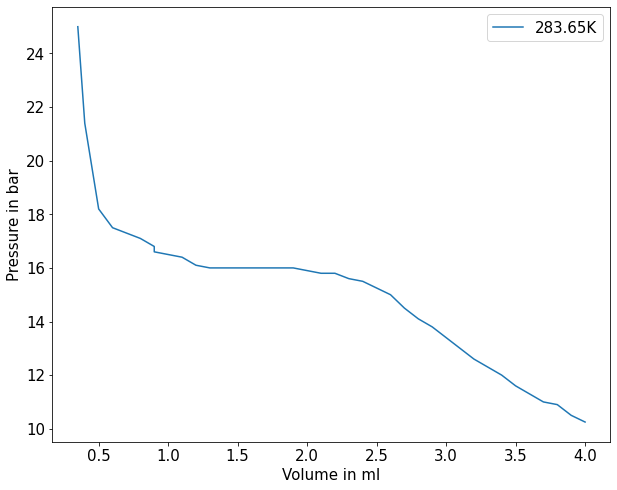

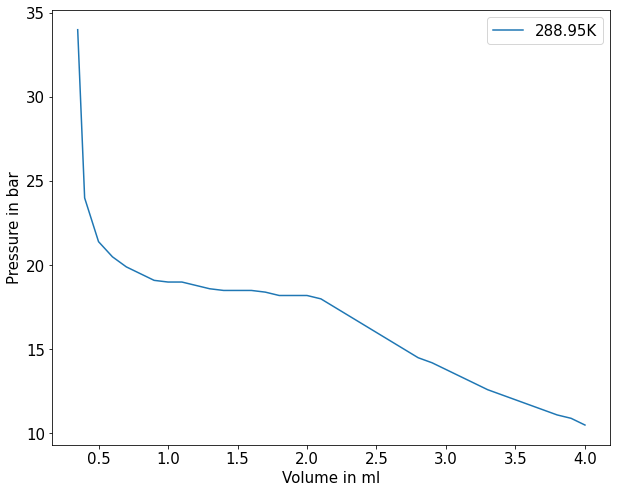

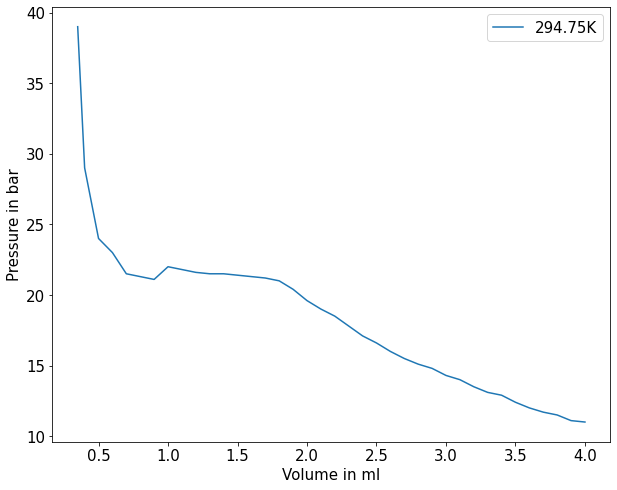

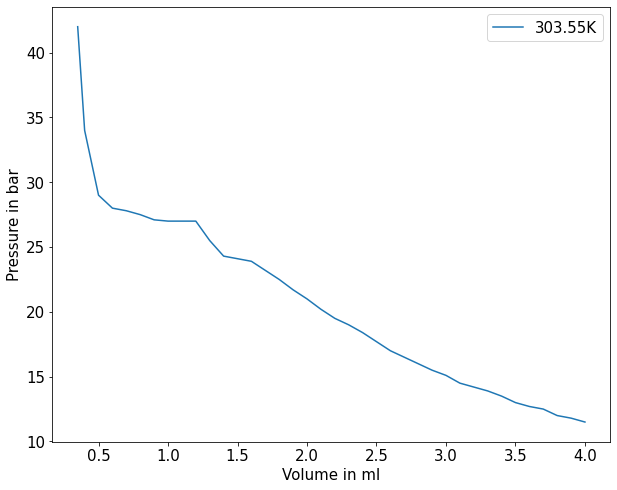

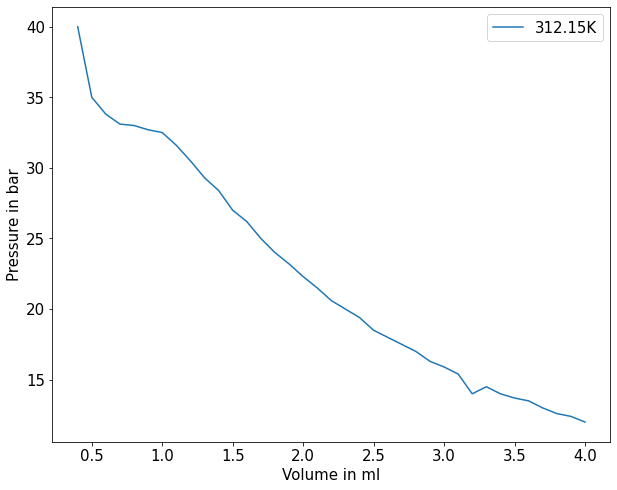

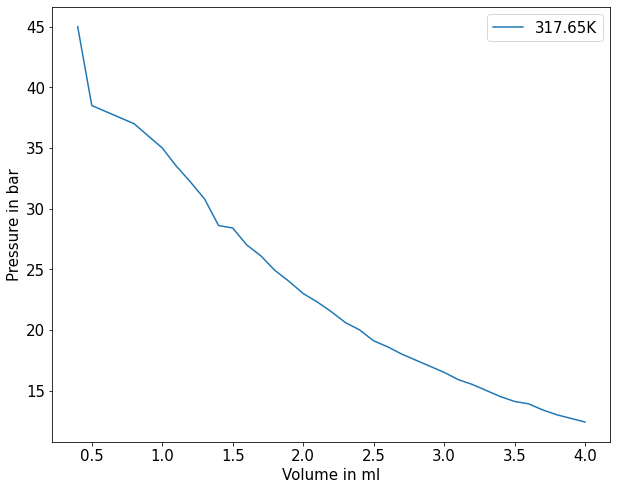

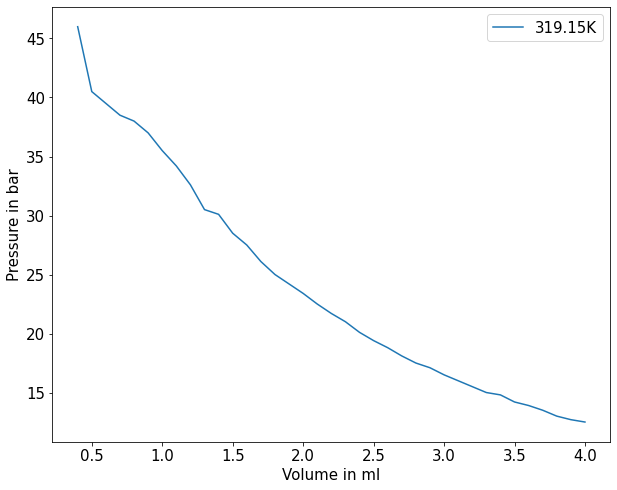

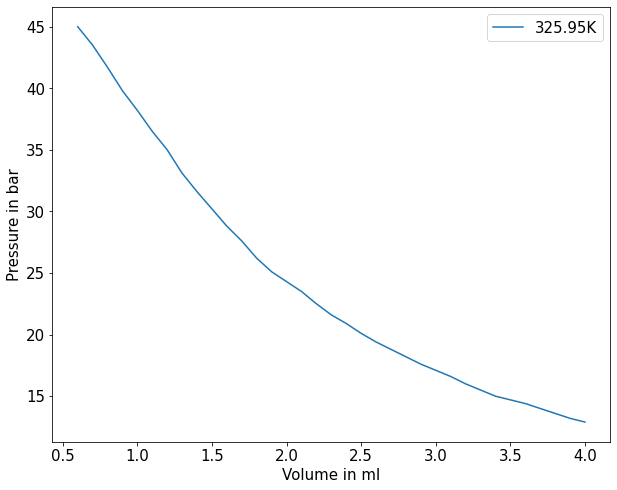

In [21]:
for i in range(8):
    fig, ax = plt.subplots()
    vol = Iso[i]['vol'].to_numpy()
    press = Iso[i]['press'].to_numpy()
    ax.plot(vol,press, label=f"{round(Temp[i],3)}K")
    plt.xlabel("Volume in ml")
    plt.ylabel("Pressure in bar")
    plt.legend()
    plt.show()

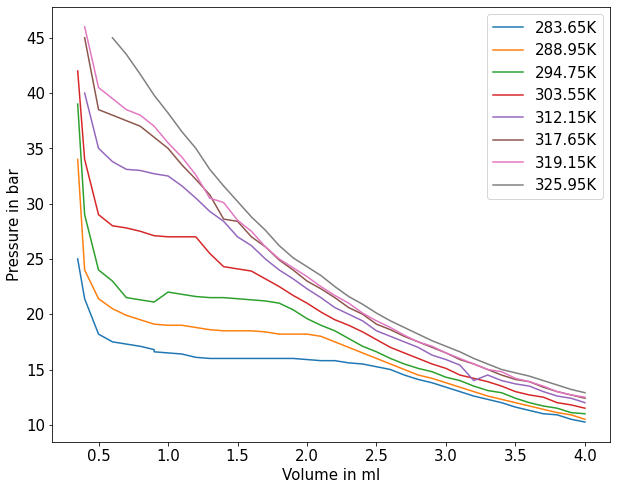

In [22]:
for i in range(8):
    vol = Iso[i]['vol'].to_numpy()
    press = Iso[i]['press'].to_numpy()
    plt.plot(vol, press, label=f"{round(Temp[i],3)}K")
    plt.xlabel("Volume in ml")
    plt.ylabel("Pressure in bar")
    plt.legend()
plt.show()

<h3>Sättigungsdruck</h3>

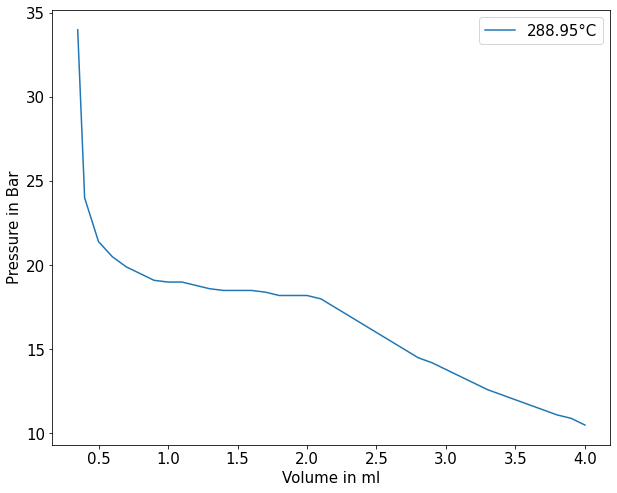

In [23]:
Nummer=2

vol = Iso[Nummer-1]['vol'].to_numpy()
press = Iso[Nummer-1]['press'].to_numpy()
fig, ax = plt.subplots()
ax.plot(vol, press, label=f"{Temp[Nummer-1]}°C")
plt.xlabel("Volume in ml")
plt.ylabel("Pressure in Bar")
plt.legend()
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

In [24]:
ps = np.array([16,18.8,23,27.35,32.85,34.4])*10**5

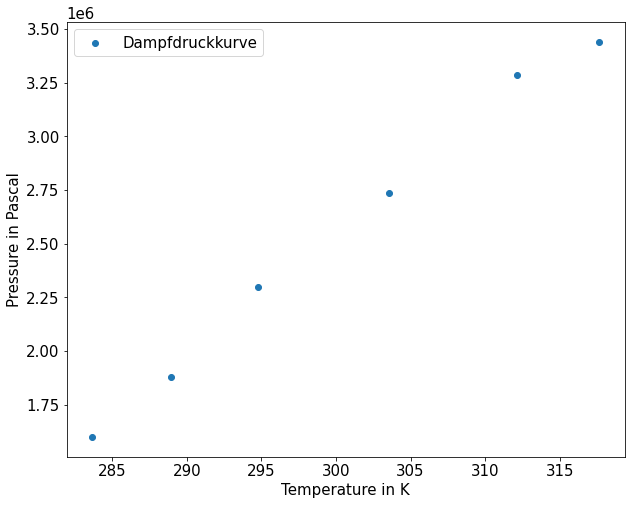

In [25]:
plt.scatter(Temp[:6:], ps, label="Dampfdruckkurve")
plt.xlabel("Temperature in K")
plt.ylabel("Pressure in Pascal")
plt.legend()
plt.show()

<h3>Aufgabe 3</h3>

Für unsere Dampfdruckkurve gilt:
$p_s=p_{s0} \cdot \exp^{\frac{-Q_{2,3}}{R \cdot T}}$<br>
Plottet man $\log(p_s)$ auf $\frac{1}{T}$ so ergibt sich folgende Gerade:

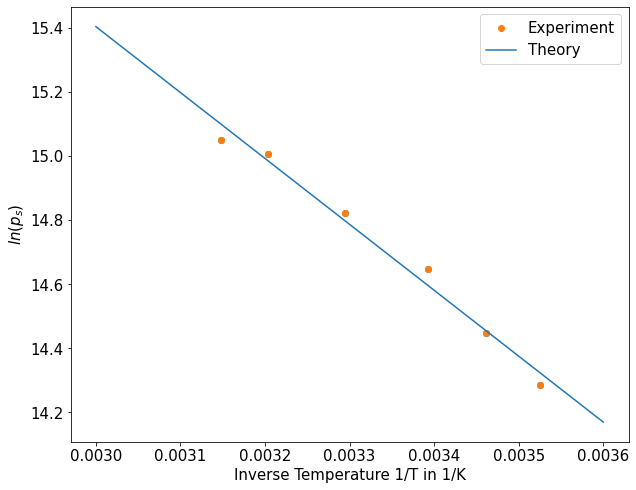

Steigung m = -2055.2689471972344
Konstante n = 21.56917698947437
RMSE = 0.035317243178809986


In [26]:
def theory(x,m,n):
    return m*x+n

y = np.log(ps)
x = 1/np.array(Temp[:6:])

m, cov = curve_fit(theory, x,y)


plt.scatter(x,y)
plt.scatter(x,y, label="Experiment")

x2=np.linspace(0.003,0.0036,100)
y2=theory(x2,m[0],m[1])
plt.plot(x2,y2, label="Theory")

plt.xlabel("Inverse Temperature 1/T in 1/K")
plt.ylabel(f"$ln(p_s) $")
plt.legend()
plt.show()

print(f"Steigung m = {m[0]}")
print(f"Konstante n = {m[1]}")
print(f"RMSE = {getRMSE(y,theory(x,m[0], m[1]) )}")

Aus der Beziehung $m= -\frac{Q_{23}}{R}$ folgt $Q_{23}=-m \cdot R = 17088 \pm 0.291J$<br>
Für $p_0$ gilt $p_0=e^n=(2.31 \pm 0.81) \cdot 10^9$<br>

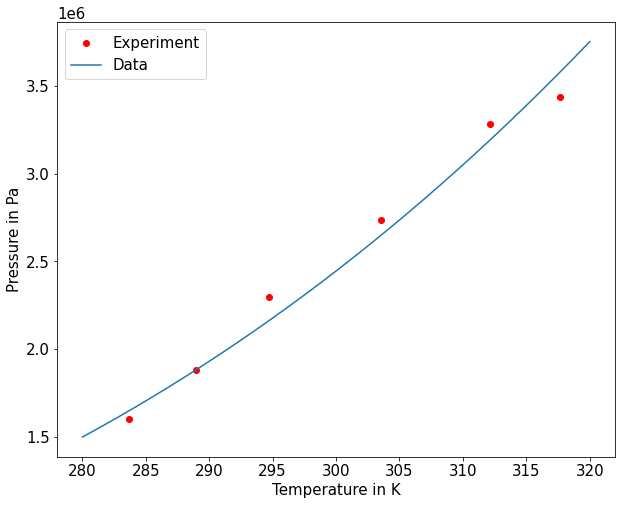

In [27]:
p0=2.31*10**9
Q=17088
R=8.3145

x=np.linspace(280,320,1000)
y = p0 * np.exp(-Q/(R*x))

plt.scatter(Temp[:6:], ps, label="Experiment", color="red")
plt.plot(x,y, label="Data")
plt.legend()
plt.xlabel("Temperature in K")
plt.ylabel("Pressure in Pa")
plt.show()



Mit $n=0.002111mol$ folgt für die molare Verdampfungswärme $Q_n=\frac{Q}{n}=846.76 \pm 15.4kJ$

<h3>Aufgabe 4</h3>

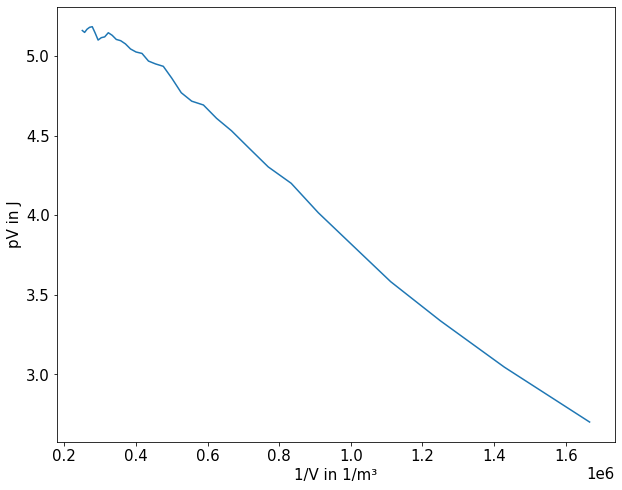

In [28]:
vol = Iso[7]['vol'].to_numpy()*10**-6    #m³
press = Iso[7]['press'].to_numpy()*10**5 #Pa
pv = vol * press
invvol = 1/vol

plt.xlabel("1/V in 1/m³")
plt.ylabel("pV in J")
plt.plot(invvol, pv)
plt.show()

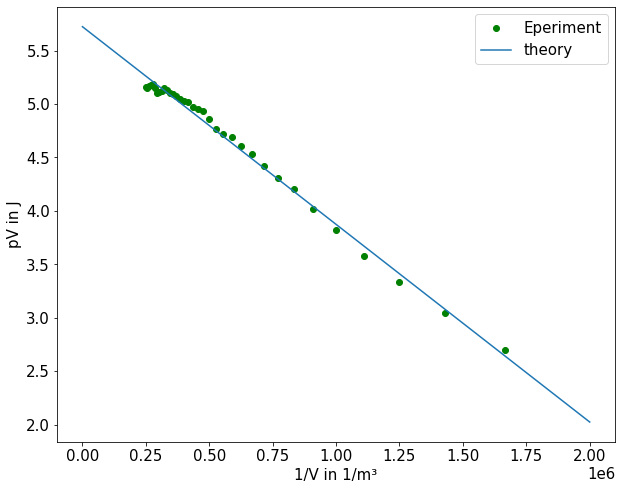

Steigung k1 = -1.849559651777503e-06
Konstante k2 = 5.723216962376645
RMSE=0.009935476487645688


In [29]:
def theory(x,m,n):
    return m*x+n

m, cov = curve_fit(theory,invvol,pv)
plt.scatter(invvol,pv, label="Eperiment", color="green")
plt.plot(np.linspace(0,2000000,1000), theory(np.linspace(0,2000000,1000),m[0],m[1]), label="theory")

plt.xlabel("1/V in 1/m³")
plt.ylabel("pV in J")
plt.legend()
plt.show()
print(f"Steigung k1 = {m[0]}")
print(f"Konstante k2 = {m[1]}")
print(f"RMSE={getRMSE(pv, theory(invvol, m[0], m[1]))}")

Durch die Beziehung $p \cdot V = k_2 = n \cdot R \cdot T$ folgt $n=\frac{k_2}{R \cdot T} = 0.002111 \pm 0.000004mol$

<h3>Aufgabe 5</h3>

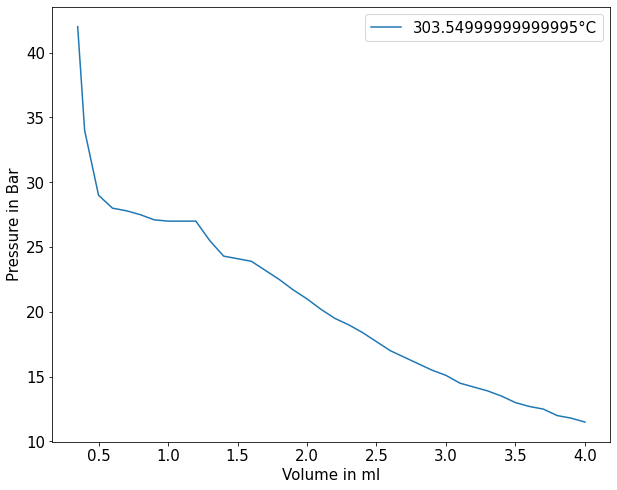

In [30]:
Nummer=4

vol = Iso[Nummer-1]['vol'].to_numpy()
press = Iso[Nummer-1]['press'].to_numpy()
fig, ax = plt.subplots()
ax.plot(vol, press, label=f"{Temp[Nummer-1]}°C")
plt.xlabel("Volume in ml")
plt.ylabel("Pressure in Bar")
plt.legend()
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

In [31]:
T = np.array([10.5,15.8,21.6,30.4,39.0,44.5])+273.15
ps = np.array([16,18.8,23,27.35,32.85,34.4])*10**5
dV=np.array([1.43,1.25,1.11,0.71,0.36,0.23])*10**-6
n=0.002111

p0=2.31*10**9
R=8.3145

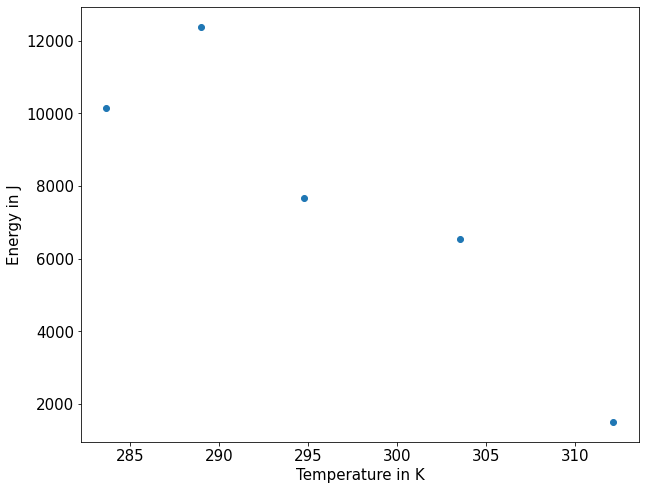

In [32]:
Q = []
for i in range (5):
    q = T[i]*dV[i]/n*(ps[i+1]-ps[i])/(T[i+1]-T[i])
    Q.append(q)

plt.scatter(T[:5:],Q)
plt.xlabel("Temperature in K")
plt.ylabel("Energy in J")

plt.show()

[]

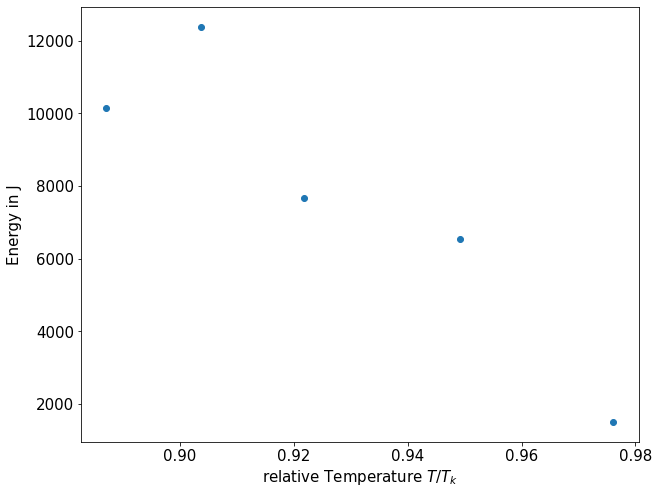

In [33]:
plt.scatter(T[:5:]/(46.63+273.15), Q)
plt.xlabel("relative Temperature $T/T_k$")
plt.ylabel("Energy in J")
plt.plot()

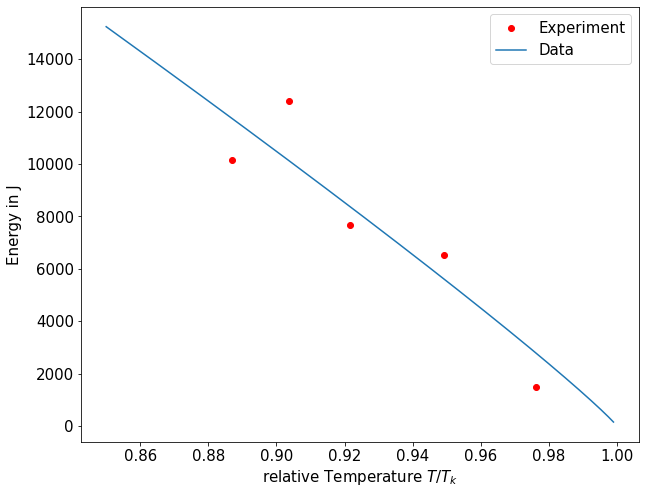

0.9229004060209312
102.96565257330978


In [34]:
Tk=46.63+273.15
def theory(T, Q0,ex):
    return Q0*np.power(1-T, ex)
Q0, cov = curve_fit(theory, T[:5]/(Tk), Q)

plt.scatter(T[:5:]/Tk,Q, label="Experiment", color="red")
plt.plot(np.linspace(0.85,0.999,1000),theory(np.linspace(0.85,0.999,1000), Q0[0],Q0[1]), label="Data")

plt.xlabel("relative Temperature $T/T_k$")
plt.ylabel("Energy in J")
plt.legend()
plt.show()

print(Q0[1])
print(getRMSE(Q,theory(T[:5]/Tk,Q0[0],Q0[1])))